In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv("E:\\projects\\UCI11\\ionosphere.csv")

In [3]:
# to find missing values
print(dataset.isnull().sum())

id       0
a01      0
a02      0
a03      0
a04      0
a05      0
a06      0
a07      0
a08      0
a09      0
a10      0
a11      0
a12      0
a13      0
a14      0
a15      0
a16      0
a17      0
a18      0
a19      0
a20      0
a21      0
a22      0
a23      0
a24      0
a25      0
a26      0
a27      0
a28      0
a29      0
a30      0
a31      0
a32      0
a33      0
a34      0
class    0
dtype: int64


In [4]:
X = dataset.iloc[:, 1:35].values
y = dataset.iloc[:, 35].values

In [5]:
# perform label encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)

In [6]:
# feature scaling
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
X = standard.fit_transform(X)

In [7]:
# separating training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=90, random_state=0)

In [10]:
# simple logistic regression
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression()
classifier_LR.fit(X_train, y_train)
yprob_LR = classifier_LR.predict_proba(X_test)[:, 1]
ypred_LR = np.where(yprob_LR > 0.5, 1, 0)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
cm_LR = confusion_matrix(y_test, ypred_LR)
acc_LR = accuracy_score(y_test, ypred_LR)
print("Confusion Matrix (LR):\n", cm_LR)
print("Accuracy Score (LR): ", acc_LR)

Confusion Matrix (LR):
 [[32  6]
 [ 0 52]]
Accuracy Score (LR):  0.9333333333333333


In [12]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, yprob_LR)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9170040485829959


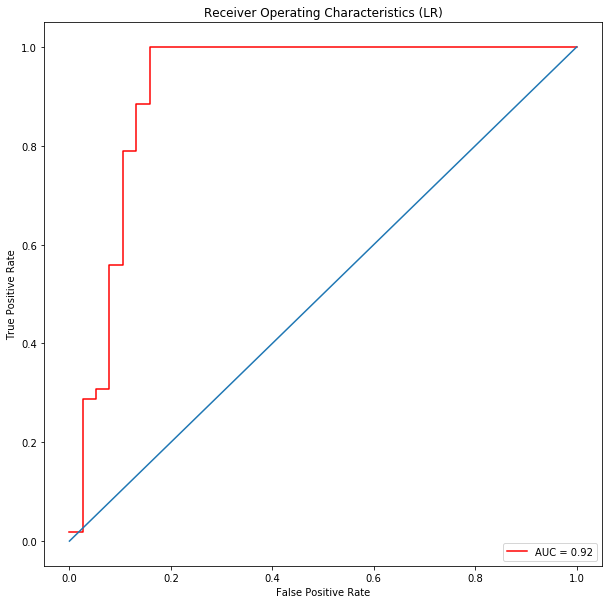

In [13]:
# plotting ROC Curve
plt.figure(figsize=(10, 10))
plt.title("Receiver Operating Characteristics (LR)")
plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='-')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [14]:
# LR tuning
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}]
grid_search = GridSearchCV(estimator=classifier_LR, param_grid=parameters, scoring='accuracy', cv=10)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.8812260536398467
{'C': 1, 'penalty': 'l1'}


In [15]:
# Logistic Regression - after tuning
from sklearn.linear_model import LogisticRegression
LR_tuned = LogisticRegression(C=1, penalty='l1')
LR_tuned.fit(X_train, y_train)
yprob_tuned = LR_tuned.predict_proba(X_test)[:, 1]
ypred_tuned = np.where(yprob_tuned > 0.5, 1, 0)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
cm_tuned = confusion_matrix(y_test, ypred_tuned)
acc_tuned = accuracy_score(y_test, ypred_tuned)
print("\nAccuracy(after tuning): ", acc_tuned*100, "%")
print("Confusion Matrix(after tuning):\n", cm_tuned)


Accuracy(after tuning):  93.33333333333333 %
Confusion Matrix(after tuning):
 [[32  6]
 [ 0 52]]


In [17]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, yprob_tuned)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9377530364372471


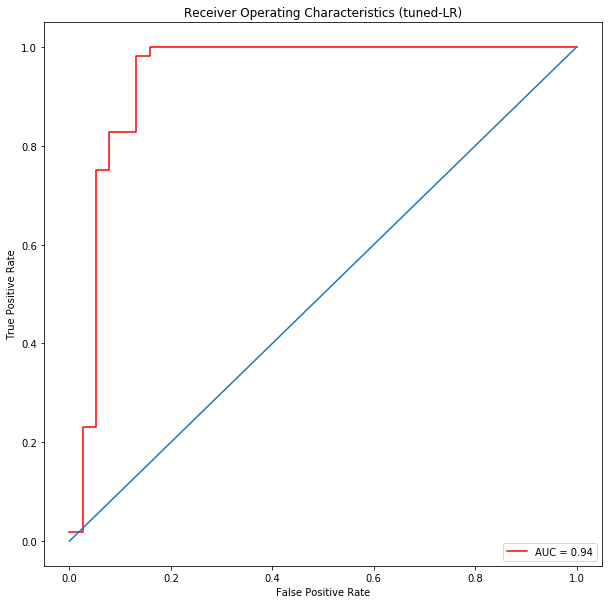

In [18]:
# plotting ROC Curve
plt.figure(figsize=(10, 10))
plt.title("Receiver Operating Characteristics (tuned-LR)")
plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='-')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [19]:
# SVM
from sklearn.svm import SVC
classifier = SVC(C=10, kernel='rbf', gamma=0.1, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: ", acc*100, "%")
print("Confusion Matrix:\n", cm)

Accuracy:  96.66666666666667 %
Confusion Matrix:
 [[37  1]
 [ 2 50]]


In [21]:
# grid selection
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear', 'sigmoid']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma':[0.5, 0.1, 0.01, 0.001]},
              {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree':[1,2,3,4,5], 'coef0':[0.0, 0.1, 0.2, 0.3], 'gamma':[0.5, 0.1, 0.01, 0.001]}]
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=10)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.9348659003831418
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [22]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9676113360323887


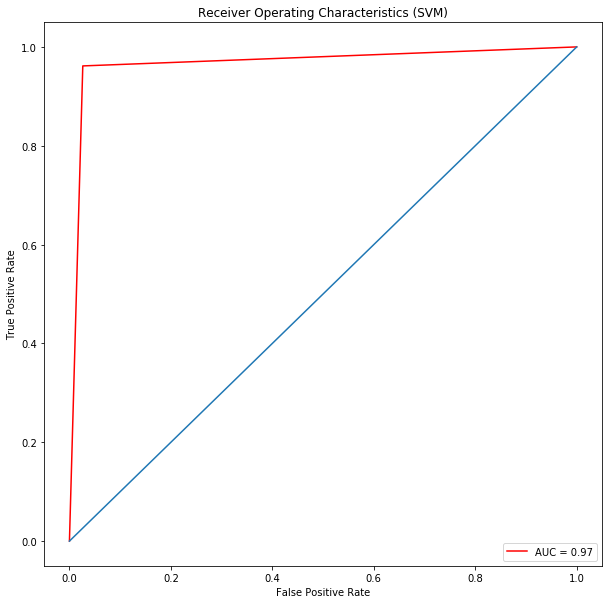

In [23]:
# plotting ROC Curve
plt.figure(figsize=(10, 10))
plt.title("Receiver Operating Characteristics (SVM)")
plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='-')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [28]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: ", acc*100, "%")
print("Confusion Matrix:\n", cm)

Accuracy:  85.55555555555556 %
Confusion Matrix:
 [[26 12]
 [ 1 51]]


In [31]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.8324898785425101


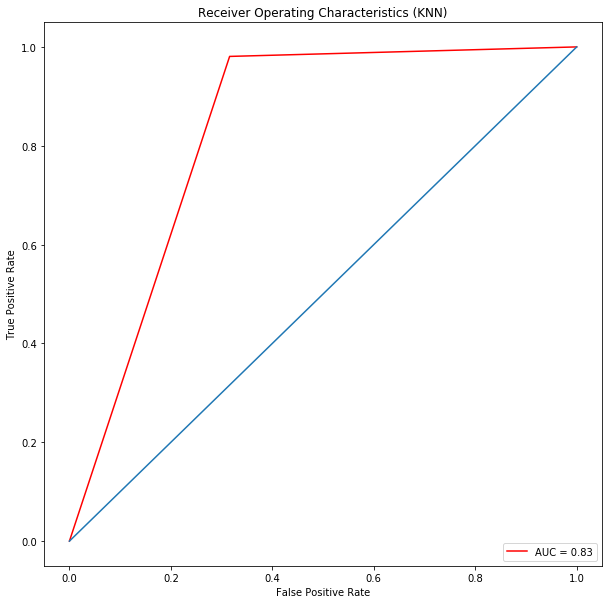

In [32]:
# plotting ROC Curve
plt.figure(figsize=(10, 10))
plt.title("Receiver Operating Characteristics (KNN)")
plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='-')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [33]:
# grid selection
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p':[1, 2, 3], 'weights':['uniform', 'distance'],
               'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}]
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=10)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.896551724137931
{'algorithm': 'auto', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}


In [34]:
# KNN - tuned
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm='auto', n_neighbors=2, p=1, weights='uniform')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: ", acc*100, "%")
print("Confusion Matrix:\n", cm)

Accuracy:  94.44444444444444 %
Confusion Matrix:
 [[33  5]
 [ 0 52]]


In [36]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9342105263157895


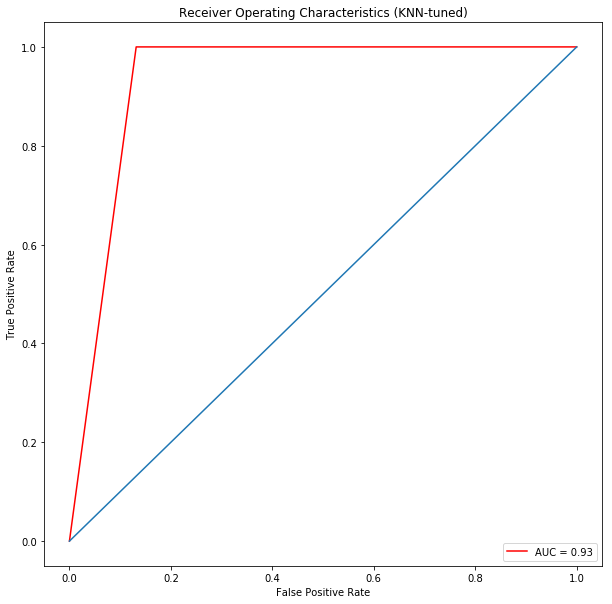

In [37]:
 # plotting ROC Curve
plt.figure(figsize=(10, 10))
plt.title("Receiver Operating Characteristics (KNN-tuned)")
plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='-')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [38]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: ", acc*100, "%")
print("Confusion Matrix:\n", cm)

Accuracy:  95.55555555555556 %
Confusion Matrix:
 [[35  3]
 [ 1 51]]


In [40]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.950910931174089


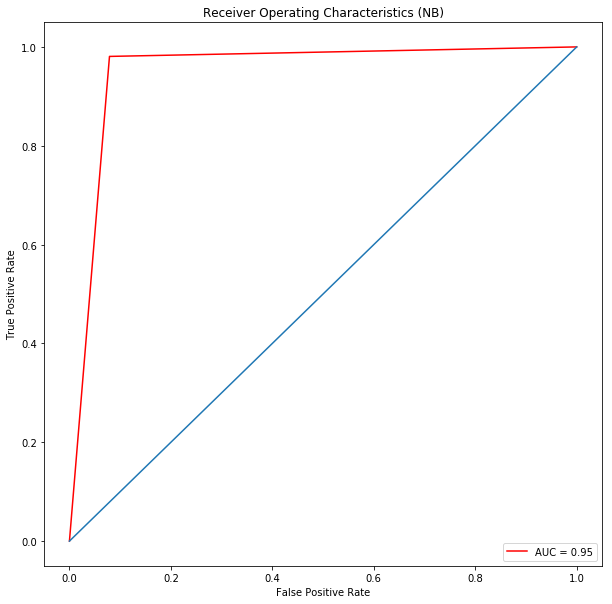

In [41]:
# plotting ROC Curve
plt.figure(figsize=(10, 10))
plt.title("Receiver Operating Characteristics (NB)")
plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='-')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [42]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: ", acc*100, "%")
print("Confusion Matrix:\n", cm)

Accuracy:  94.44444444444444 %
Confusion Matrix:
 [[35  3]
 [ 2 50]]


In [44]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9412955465587045


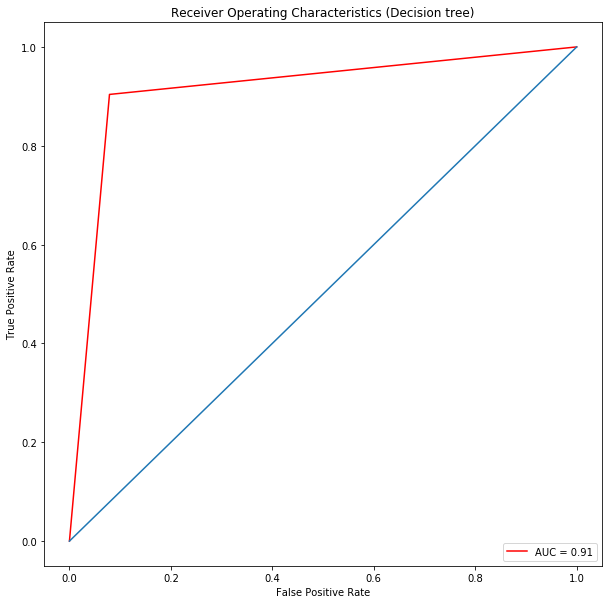

In [50]:
# plotting ROC Curve
plt.figure(figsize=(10, 10))
plt.title("Receiver Operating Characteristics (Decision tree)")
plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='-')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [46]:
# grid selection
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2']}]
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=10)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.8697318007662835
{'criterion': 'entropy', 'max_features': 'auto'}


In [47]:
# Decision Tree-tuned
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', max_features='auto', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: ", acc*100, "%")
print("Confusion Matrix:\n", cm)

Accuracy:  91.11111111111111 %
Confusion Matrix:
 [[35  3]
 [ 5 47]]


0.9124493927125505


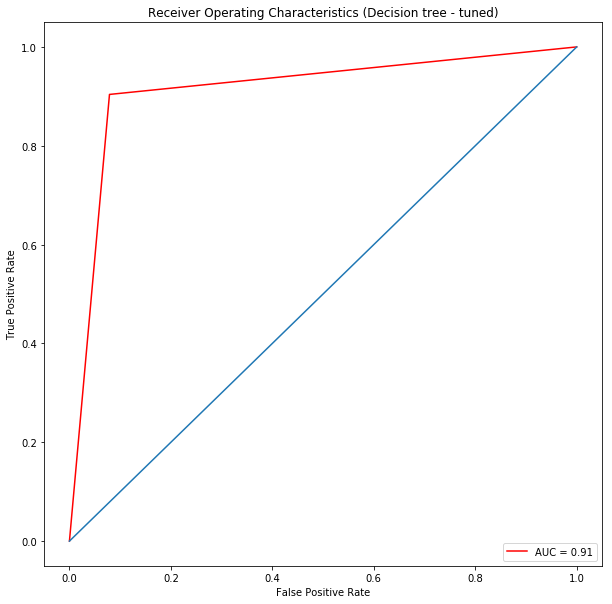

In [51]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

# plotting ROC Curve
plt.figure(figsize=(10, 10))
plt.title("Receiver Operating Characteristics (Decision tree - tuned)")
plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='-')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [52]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: ", acc*100, "%")
print("Confusion Matrix:\n", cm)

Accuracy:  95.55555555555556 %
Confusion Matrix:
 [[35  3]
 [ 1 51]]


0.950910931174089


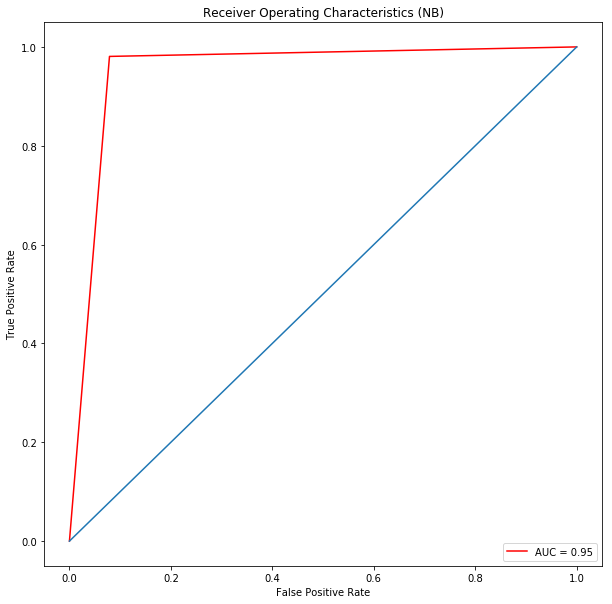

In [54]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

# plotting ROC Curve
plt.figure(figsize=(10, 10))
plt.title("Receiver Operating Characteristics (NB)")
plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='-')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [55]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators':[1, 5, 10, 15, 20, 30], 'criterion': ['gini', 'entropy'],
               'max_features': ['auto', 'sqrt', 'log2']}]
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=10)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.9195402298850575
{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 30}


In [56]:
# Random Forest - tuned
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=30, criterion='entropy', max_features='auto', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: ", acc*100, "%")
print("Confusion Matrix:\n", cm)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

Accuracy:  96.66666666666667 %
Confusion Matrix:
 [[36  2]
 [ 1 51]]
0.9640688259109312


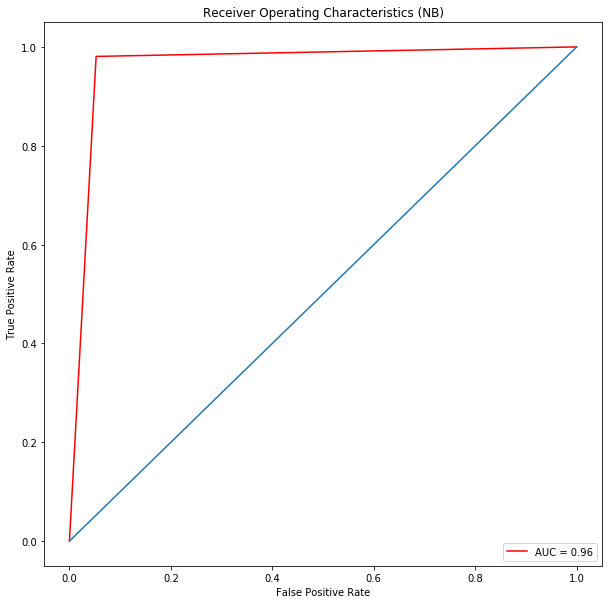

In [58]:
# plotting ROC Curve
plt.figure(figsize=(10, 10))
plt.title("Receiver Operating Characteristics (NB)")
plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='-')
plt.axis('tight')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()